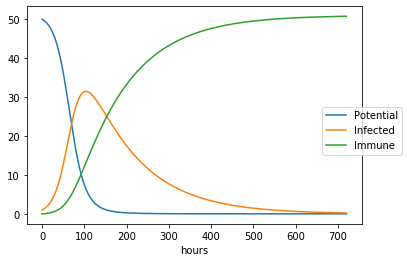

In [642]:
from numpy import zeros, linspace
import seaborn as sns 
import matplotlib.pyplot as plt

# Given Conditions
# What happens to virulence within a closed system?
# 10 people were infected in 24 hours - there were initially 40 people and 8 infected   
virulence = 10./(40*8*24)
# of the 15 infected, 3 recovered in 24 hours
cureRate = 3./(15*24)

# Simulation Duration
delta = 0.1
timePeriod = 30
simulationEnd = int(timePeriod*24/dt)

# Declare the size of the array and simulation space
time = linspace(0, simulationEnd*delta, simulationEnd+1)
Potential = zeros( simulationEnd+1)
Infected = zeros( simulationEnd+1)
Recovered = zeros( simulationEnd+1)

# Setup the initial conditions
Potential[0] = 50
Infected[0] = 1
Recovered[0] = 0

for today in range( simulationEnd ):
    tomorrow = today+1
    newInfections = delta * virulence * Potential[today]*Infected[today]
    newRecoveries = delta * cureRate * Infected[today]
    
    Potential[tomorrow] = Potential[today] - newInfections
    Infected[tomorrow] = Infected[today] + newInfections - newRecoveries
    Recovered[tomorrow] = Recovered[today] + newRecoveries

fig = plt.figure()
l1, l2, l3 = plt.plot(time, Potential, time, Infected, time, Recovered)
fig.legend( (l1, l2, l3), ('Potential', 'Infected', 'Immune'), 'right' )
plt.xlabel('hours')
plt.show()
#plt.savefig('tmp.pdf')